In [3]:
import numpy as np
import time
import pandas as pd
import matplotlib.pyplot as plt
import RAi_ML

In [4]:
df = pd.read_csv("Varied.csv")

In [5]:
dataSet = df.copy()
dataSet.columns = ['x','y']
dataSet.head()

,x,y
0,-7.496770,-4.795778
1,-9.876978,-6.828510
2,2.209805,0.316721
3,1.820086,0.265529
4,-9.256011,-5.956185


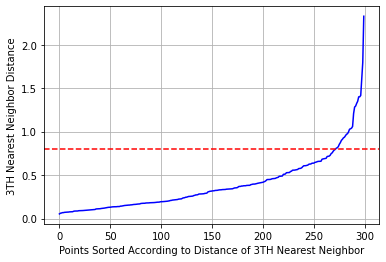

In [6]:
data = df.to_numpy()
eps = 0.8
minPts = 3
db = RAi_ML.DBSCAN(data=data,eps = eps, minPts = minPts)
db.best_eps()
plt.axhline(eps,color='r',linestyle = "--");

In [7]:
data.shape

(300, 2)

In [8]:
start = time.time()
dist = db.distance_matrix()
df2 = pd.DataFrame(dist)
end = time.time()
print("total time with numpy : ",end - start)

total time with numpy :  0.0015096664428710938


In [9]:
df2

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,0.000000,3.130078,10.970654,10.602860,2.107480,11.072976,10.558397,5.188002,2.726708,10.540333,...,10.182241,1.904613,11.239901,3.269174,5.384901,11.254150,11.486200,9.592288,3.761180,11.108043
1,3.130078,0.000000,14.040821,13.680157,1.070772,14.175990,13.660466,7.255140,5.847800,13.639972,...,13.233856,2.484968,14.298481,3.036952,8.504072,14.322759,14.568544,12.714653,6.403203,14.233599
2,10.970654,14.040821,0.000000,0.393067,13.069594,0.811282,0.855304,10.708647,8.266232,0.803680,...,0.867795,11.893824,0.348510,13.517947,5.657655,0.284594,0.586297,3.388401,9.418781,1.782603
3,10.602860,13.680157,0.393067,0.000000,12.703922,0.803780,0.602396,10.318946,7.893783,0.535090,...,0.645793,11.550441,0.730689,13.131840,5.276963,0.671866,0.893237,3.085020,9.025763,1.685620
4,2.107480,1.070772,13.069594,12.703922,0.000000,13.179890,12.665155,6.296412,4.834093,12.646726,...,12.274378,2.002874,13.334983,2.486867,7.492115,13.352658,13.588878,11.663679,5.351271,13.212024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,11.254150,14.322759,0.284594,0.671866,13.352658,0.859521,1.047828,10.972010,8.550447,1.008169,...,1.125508,12.170778,0.199352,13.801662,5.942181,0.000000,0.385906,3.568756,9.694806,1.831005
296,11.486200,14.568544,0.586297,0.893237,13.588878,0.682442,1.050648,11.040446,8.772723,1.035303,...,1.452523,12.443665,0.565459,13.979625,6.144182,0.385906,0.000000,3.471142,9.816632,1.584199
297,9.592288,12.714653,3.388401,3.085020,11.663679,2.789239,2.533541,7.954829,6.935183,2.585227,...,3.368868,10.960277,3.722053,11.526889,4.413744,3.568756,3.471142,0.000000,7.073827,2.105734
298,3.761180,6.403203,9.418781,9.025763,5.351271,9.252480,8.778795,1.937288,2.895041,8.785146,...,8.805547,5.650299,9.745808,4.525752,4.109367,9.694806,9.816632,7.073827,0.000000,8.978770


In [10]:
db.fit()
border = db.border
noise = db.noise

In [11]:
noise.shape[0]

31

In [12]:
dataSet = db.dataSet

In [13]:
db.naighbors(3)

Int64Index([274, 197, 282,  41, 241, 165,  28, 144, 106, 156, 255, 158, 137,
             85, 247, 228, 136,  50, 139,  78,   2, 173, 240, 253,  84,  81,
            161, 183, 279,  38, 201, 126, 175,  69, 242, 224,   9, 189, 129,
             71, 159, 102, 167, 149, 280,   6, 124, 120,  89, 266, 290, 203,
            248, 295, 244, 193, 232, 154, 292,  52, 184, 130,  94, 263,  67,
            164],
           dtype='int64')

In [14]:
c = db.predict()

In [15]:
c.value_counts()

2    101
1     91
4     35
3     33
0     31
6      5
5      4
Name: Clusters, dtype: int64

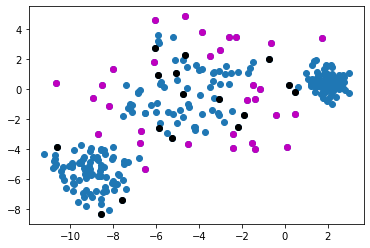

In [16]:
plt.scatter(df.iloc[:,0],df.iloc[:,1]);
plt.scatter(border.iloc[:,0],border.iloc[:,1],color = 'k');
plt.scatter(noise.iloc[:,0],noise.iloc[:,1],color = 'm');

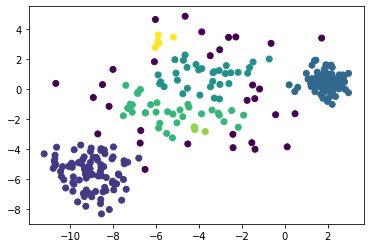

In [24]:
plt.scatter(df.iloc[:,0],df.iloc[:,1],c = c,cmap="viridis");

In [25]:
kmData = df.to_numpy()

In [26]:
km = RAi_ML.KMean(4)

In [27]:
km.fit(kmData)

KMean Algorithem completed


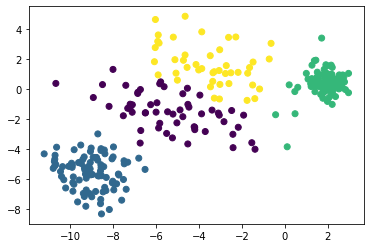

In [31]:
km.model_plot()